# 3. 신경망의 기본 구성 요소
## 3.1. 퍼셉트론: 가장 간단한 신경망

In [1]:
# 파이토치로 구현한 퍼셉트론

import torch
import torch.nn as nn

class Perceptron(nn.Module):
    """퍼셉트론은 하나의 선형 층이다.
       선형함수(wx+b)와 비선형함수(f:활성화함수)의 조합
       y = f(wx + b): 벡터 w,x의 점곱"""
    
    def __init__(self, input_dim):
        # input_dim: 입력 특성의 크기 (int)
        super(Perceptron, self).__init__()  # super(): 자식 클래스에서 부모클래스의 내용을 사용
        self.fc1 = nn.Linear(input_dim, 1)
        # 아핀변환: wx + b (torch.nn.Linear(__))
        
    def forward(self, x_in):
        """ 퍼셉트론의 정방향 계산 """
        # x_in: 입력 데이터 텐서
        # x_in.shape는 (batch, num_features)
        # 반환값: (batch,) 모양
        return torch.sigmoid(self.fc1(x_in)).squeeze()
        # 활성화함수: torch.sigmoid(wx+b) - 시그모이드 함수

## 3.2. 활성화 함수
- 비선형 함수로, 신경망에서 데이터의 복잡한 관계 감지

### 3.2.1. 시그모이드
- 신경망 분야의 초창기부터 사용
- 임의의 실수값 받아 0~1 범위로 압축
- f(x) = 1/ (1+e^-x): 미분가능한 부드러운 함수

C:\Users\answl\AppData\Local\Temp\ipykernel_18748\2463231967.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


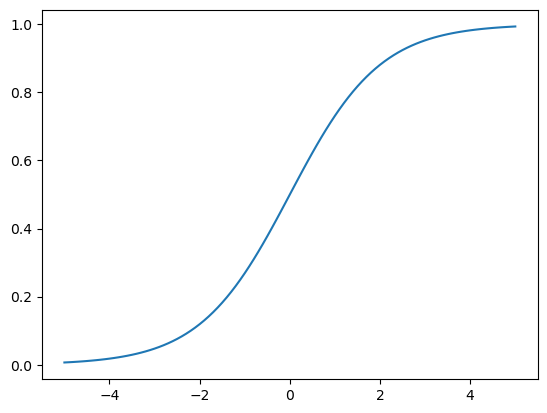

In [2]:
import torch
import matplotlib.pyplot as plt

x = torch.range(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

입력 범위 대부분에서 매우 빠르게 포화되어 극단적 출력을 만든다.

--> 그래디언트가 0(그래디언트 소실 문제, vanishing gradient problem) or 발산하여 부동소수 오버플로(그래디언트 폭주 문제, exploding gardient problem)

--> 시그모이드 활성화 함수는 거의 출력층에서만 사용: 출력을 확률로 압출할 때

### 3.2.2. 하이퍼볼릭 탄젠트
- Hyperbolic Tangent(tanh): 시그모이드 함수의 변종
- f(x) = tanh x = (e^x - e^(-x)) / (e^x + e^(-x))
    - = (2/ (1+e^-2x)) -1 = 2σ(2x) -1 (시그모이드 함수 σ)
- 마찬가지로 압축함수, (-inf, inf) 범위 대신 [-1, +1]

C:\Users\answl\AppData\Local\Temp\ipykernel_18748\305239739.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


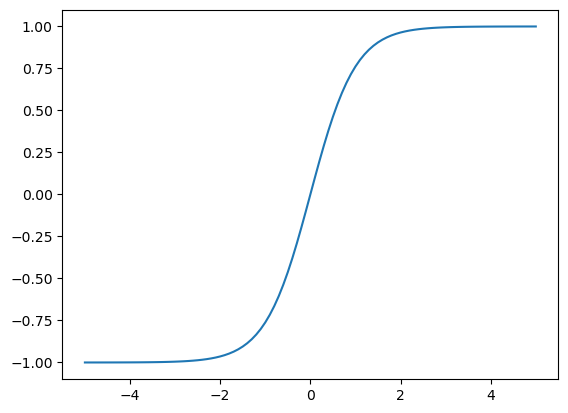

In [3]:
x = torch.range(-5., 5., 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

### 3.2.3. 렐루 (ReLU: Rectified Linear Unit)
- 가장 중요한 활성화 함수! 딥러닝 혁신에 상당 기여
- 신경망의 활성화 함수로는 최근 등장, 매우 간단 
- f(x) = max(0,x)
- 역할: 음수값을 0으로 자르기

C:\Users\answl\AppData\Local\Temp\ipykernel_18748\807957216.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


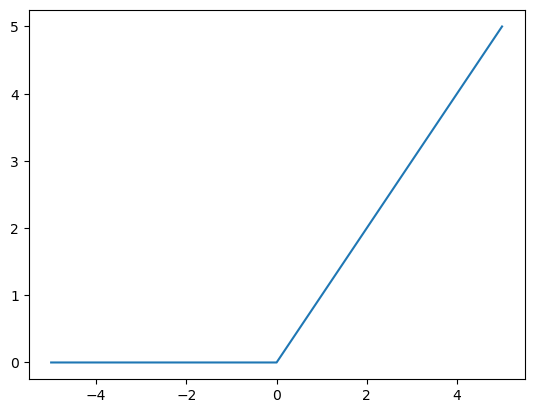

In [4]:
relu = torch.nn.ReLU()
x = torch.range(-5., 5., 0.1)
y = relu(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

렐루는 음수를 제거해 그래디언트 소실 문제에 도움됨!
- but 시간 지나 신경망 특정 출력이 0되면 다시 돌아오지 않는다는 문제점 (-) : "죽은 렐루" 문제
- --> 리키 렐루(LeakyReLU), PReLU(Parametric ReLU) 변종 개발
- PReLU: f(x) = max(x, ax) : 누수 파라미터 a(학습되는 파라미터)
- <-> 리키 렐루의 누수 파라미터는 사전에 설정하는 하이퍼파라미터

C:\Users\answl\AppData\Local\Temp\ipykernel_18748\2528385715.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


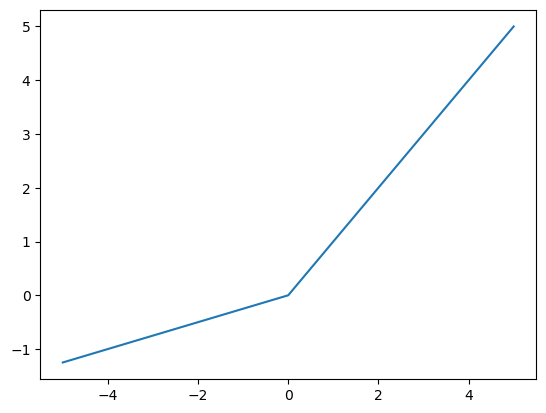

In [6]:
prelu = torch.nn.PReLU(num_parameters=1)
x = torch.range(-5., 5., 0.1)
y = prelu(x)

# plt.plot(x.numpy(), y.numpy()) # 오류
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()

### 3.2.4. 소프트맥스(softmax)
- 신경망 유닛의 출력을 0~1 사이로 압축 (=시그모이드)
- 모든 출력의 합으로 각 출력을 나눠 k개 클래스에 대한 이산확률분포로 만듦.
- 소프트맥스 출력의 합은 1이 됨. --> 분류 작업의 출력을 해석하는 데 유용
- --> "범주형 크로스 엔트로피"(확률 기반 목적 함수)와 함께 사용

In [8]:
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[0.0831, 1.5912, 1.2372]])
tensor([[0.1151, 0.5200, 0.3650]])
tensor([1.])
